In [1]:
import os
import sys

import matplotlib.pyplot as plt
sys.path.insert(0, "../")


%load_ext autoreload
%autoreload 2

In [2]:
import src.utils.metrics as metrics
meter = metrics.AvgMeter()

/cvlabdata2/home/davydov/miniconda3/envs/hmr_ssl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# accel_err_train.pth  camera_scale_reg_loss_train.pth  kpts2d_loss_train.pth  mpjpe_train.pth  pa_mpjpe_train.pth        smpl_shape_loss_train.pth
# accel_err_valid.pth  camera_scale_reg_loss_valid.pth  kpts2d_loss_valid.pth  mpjpe_valid.pth  pa_mpjpe_valid.pth        smpl_shape_loss_valid.pth
# accel_train.pth      full_train.pth                   kpts3d_loss_train.pth  mpvpe_train.pth  smpl_pose_loss_train.pth  smpl_shape_prior_loss_train.pth
# accel_valid.pth      full_valid.pth                   kpts3d_loss_valid.pth  mpvpe_valid.pth  smpl_pose_loss_valid.pth  smpl_shape_prior_loss_valid.pth

In [12]:
exp_paths = [
    "./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_8/",
    "./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_8_2nd_try/",
    "./../output/train_hmr/train_hmr_coco_eft_basic_lr5e-5_no_sched_workers_16_3rd_try/",
]

add_labels = [
    "No Sched lr 5e-5 w8 b32",
    "No Sched lr 5e-5 w8 b32 2nd try",
    "No Sched lr 5e-5 w16 b32 3rd try"
]


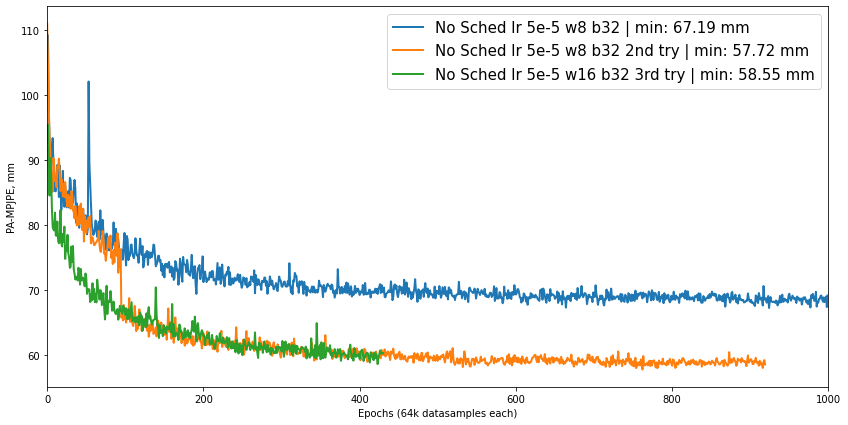

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(14, 7))
linewidth = 2

for exp_path, add_label in zip(exp_paths, add_labels):
    meter_path = os.path.join(exp_path, "metrics", "pa_mpjpe_valid.pth")
    meter.load_state(meter_path)
    ax.plot(meter.prev_vals, linewidth=linewidth, label=f"{add_label} | min: {min(meter.prev_vals):.2f} mm")

ax.set_ylabel("PA-MPJPE, mm")
ax.set_xlabel("Epochs (64k datasamples each)")
ax.set_xlim(0,1000)
ax.legend(fontsize=15)
fig.patch.set_facecolor("white")

In [11]:
min(meter.prev_vals)

tensor(58.5519)